# Математичне моделювання

**Тема: Відповідність показників алкоголю до його якості**

**Виконав: Большунов В.С., група КМ-81.**

**Керівник: доц. Норкін Б. В.**

## Визначення предметної області і постановка задачі

В якості предметної області було обрано дані про якість вина.
Метою даного дослідження є прогнозування відповідності показників
вина до його якості.

Серед етапів підготовки даних будуть поверхневий огляд значень
датасету, очищення від "битих" та непотрібних рядків, визначення основних
характеристик, розгляд даних датасету у вигляді графіків, та статистичних
значень різних показників

Необхідний датасет для виконання поставленої задачі було взято за посиланням: https://www.kaggle.com/piyushagni5/white-wine-quality

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

Вивидемо таблицю з частиною інформації датасету:

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Опис даних

Таблиця містить наступні колонки:'fixed acidity', 'volatile acidity', 'citric acid',
'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
'sulphates', 'alcohol', 'quality'.

* fixed acidity: Виправлена кислотність
* volatile acidity: Летюча кислотність
* citric acid: Лимонна кислота
* residual sugar: Залишковий цукор
* chlorides: Хлориди
* free sulfur dioxide: Вільний діоксид сірки
* total sulfur dioxide:Загальна двоокис сірки
* density: Густина
* pH: рН
* sulphates: Сульфати
* alcohol: Алкоголь
* quality: Якість (оцінка від 0 до 10)

##  Підготовка даних

Дані було очищено від пустих значень на рівні SQL запиту в базу,
але давайте все-таки перевіримо датасет на можливу наявність
пустих даних:

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Як бачимо, всі дані цілком валідні. Додаткових очищень датасет не потребує.
Тепер ми можемо вивести основні характеристики числових параметрів.
Використаємо для цього метод describe()

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Ці дані не є повністю інформативними, тому побудуємо декілька
графіків, що характеризуватимуть наш набір даних.


Спочатку виведемо гістограми.Перша гістограма продемонструє нам
відношення кількості алкоголю до якості вина.


In [7]:
from plotly.offline import init_notebook_mode, iplot
import warnings
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [8]:
avg_alc = []
for i in sorted(df['quality'].unique()):
    dff = df[df['quality']==i]
    avg_alc.append(round(dff['alcohol'].mean(),2))

In [9]:
data = [go.Bar(x = sorted(df['quality'].unique()), y = avg_alc)]
layout = go.Layout(title='Відношення кількості алкоголю до якості вина')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо, що вино з високою якість має великий процент алкоголю в
составі.

Побудуємо другу гістограму залежності якості вина від кількості лимонної
кислоти.

In [10]:
avg_citric = []
for i in sorted(df['quality'].unique()):
    dff = df[df['quality']==i]
    avg_citric.append(round(dff['citric acid'].mean(),3))

In [11]:
data = [go.Bar(x = sorted(df['quality'].unique()), y = avg_citric)]
layout = go.Layout(title='Залежність якості вина від кількості лимонної кислоти')
warnings.filterwarnings("ignore")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо, що вино з високою якість має велику кількість лимонної
кислоти в составі.

Побудуємо третю гістограму залежність якості вина від кількості загальної
двоокис сірки.

In [13]:
avg_dioxide = []
for i in sorted(df['quality'].unique()):
    dff = df[df['quality']==i]
    avg_dioxide.append(round(dff['total sulfur dioxide'].mean(),3))

In [14]:
data = [go.Bar(x = sorted(df['quality'].unique()), y = avg_dioxide)]
layout = go.Layout(title='Залежність якості вина від кількості загальної двоокис сірки')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо, що вино з високою якість має малу кількість двоокису сірки в
составі.

Побудуємо останню гістограму, яка продемонструє залежність якості вина від
кількості хлорида.


In [15]:
avg_chlorides = []
for i in sorted(df['quality'].unique()):
    dff = df[df['quality']==i]
    avg_chlorides.append(round(dff['chlorides'].mean(),3))

In [16]:
data = [go.Bar(x = sorted(df['quality'].unique()), y = avg_chlorides)]
layout = go.Layout(title='Залежність якості вина від кількості хлорида')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо, що вино з високою якість має малу кількість хлорида в составі.


## Перелік існуючих методів розв'язання поставленої задачі

Прогнозування ймовірності становлення віп клієнтом являється задачою
класифікації, адже модель має прогнозувати ймовірність згідно
характеристик нового користувача.
Для розв'язання даної задачі існують наступні методи:

* наївний байесівський метод (Naive Bayes)
* лінійний дискримінантний аналіз (Linear Discriminant
Analysis)
* логічна регресія (Logistic Regression)
* метод опорних векторів (Support Vector Machines)
* класифікатор дерева рішень (Decision Tree Classifier) / случайный лес
(Random Forests)

Наївний баєсів класифікатор — ймовірнісний класифікатор, що використовує
теорему Баєса для визначення ймовірності приналежності спостереження
(елемента вибірки) до одного з класів при припущенні (наївному) незалежності
змінних.

Дискримінантний аналіз — різновид багатовимірного аналізу, призначеного для
вирішення задач розпізнавання образів. Використовується для прийняття
рішення про те, які змінні розділюють (тобто «дискримінують») певні масиви
даних (так звані «групи»).

Логістична регресія (англ. logistic regression) — статистичний регресійний
метод, що застосовують у випадку, коли залежна змінна є бінарною, тобто може
набувати тільки двох значень (0 або 1). Є одним із класифікачних методів.

В машинному навчанні метод опорних векторів — це метод аналізу даних для
класифікації та регресійного аналізу за допомогою моделей з керованим
навчанням з пов'язаними алгоритмами навчання, які називаються
опорно-векторними машинами (ОВМ, англ. support vector machines, SVM, також
опорно-векторними мережами, англ. support vector networks)

Random forest (англ. випадковий ліс) — ансамблевий метод машинного навчання
для класифікації, регресії та інших завдань, який працює за допомогою побудови
численних дерев прийняття рішень під час тренування моделі й продукує моду
для класів (класифікацій) або усереднений прогноз (регресія) побудованих
дерев. Недоліком є схильність до перенавчання.

Використовувати будемо метод Random forest.

## Імплементація обраного методу моделювання

Оскільки була вибрана модель Random forest (англ. випадковий ліс) —
ансамблевий метод машинного навчання для класифікації, регресії та інших
завдань, який працює за допомогою побудови численних дерев прийняття
рішень під час тренування моделі й продукує моду для класів (класифікацій) або
усереднений прогноз (регресія) побудованих дерев. То створимо модель.


In [18]:
rfc = RandomForestClassifier(n_estimators=300)

##  Навчання моделі

Для того щоб перевірка точності моделі була вірною поділимо наш датасет на
тренувальні та тестові дані у відношенні сім до трьох.

In [19]:
X = df.drop(columns=['quality']).astype('float')
y = df['quality'].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print('Кількість рядків даних для тренування', len(y_train), 'а для тесту', len(y_test))

Кількість рядків даних для тренування 3918 а для тесту 980


Натренуємо нашу модель на тренувальних даних які щойно отримали

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

## Результати роботи моделі

Для оцінки результатів точності моделі класифікації спочатку зробимо
прогнози на тестових даних які ми отримали в попередньому кроці:


In [24]:
rfc_pred = rfc.predict(X_test)

Ця функція повертає прогнозований клас якості в залежності від
ймовірності, на який клас більша ймовірність тей клас і повертає
модель.
Далі для оцінки точності викоростаємо декілька функцій та дамо їм в оцінку
припущення(rfc_pred) та реальні дані(y_test):


In [26]:
print(confusion_matrix(y_test, rfc_pred))

[[  0   0   2   0   0   0   0]
 [  0   6  18  16   1   0   0]
 [  0   2 219  82   1   0   0]
 [  0   0  50 369  23   0   0]
 [  0   0   3  61  94   2   0]
 [  0   0   0   4   5  19   0]
 [  0   0   0   2   1   0   0]]


In [27]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.75      0.15      0.24        41
         5.0       0.75      0.72      0.73       304
         6.0       0.69      0.83      0.76       442
         7.0       0.75      0.59      0.66       160
         8.0       0.90      0.68      0.78        28
         9.0       0.00      0.00      0.00         3

    accuracy                           0.72       980
   macro avg       0.55      0.42      0.45       980
weighted avg       0.72      0.72      0.71       980



Перший масив показує матрицю невідповідності

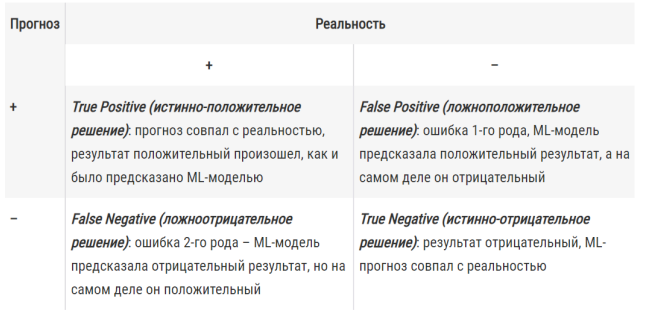

Далі йдуть певні показники які розраховуються на основі даних з попередньої
матриці, як бачимо точність моделі на достатньо високому рівні.


## Переваги та недоліки обраного методу

До переваг обраного методу розв'язання даної задачі можна віднести:
* Здатність ефективно обробляти дані з великим числом ознак і класів.
* Нечутливість до масштабування (і взагалі до будь-яких монотонних перетворень) значень ознак.
* Однаково добре обробляються як безперервні, так і дискретні ознаки.
* Існують методи побудови дерев за даними з пропущеними значеннями ознак.
* Існують методи оцінювання значущості окремих ознак в моделі.

До недоліків обраного методу розв'язання даної задачі можна
віднести:
* Алгоритм схильний до перенавчання на деяких завданнях, особливо з великою кількістю шумів
* Великий розмір отримуваних моделей


## Верифікація

В даній лабораторній роботі було побудовано та навчено модель для
класифікації якості вина за його параметрами , використовуючи дані, які було
подготовано в попередній роботі. Модель було побудовано, опираючись на
постановку задачі та характеристики тренувальних даних.
Предметна область - дані про якість вина. Задача даної роботи - побудувати
систему класифікації якості вина за його параметрами. В результаті, було
успішно побудовано та навчено модель для класифікації.
В процесі побудови моделі було проаналізовано та обрано правильні моделі для
вирішення задачі класифікації, обрано метрики для оцінки ефективності,
побудовано та навчено модель.

##  Валідація


Для підтвердження того, що модель коректно працює, її було протестовано на
тестових даних які не брали участь в тренуванні моделі. Отримані результати
мали дуже високу точність. Враховуючи вище описане, можна прийти до
висновку.


## Висновок

У ході роботи розроблено модель, яка була натренована на
оброблених даних. Основна ціль -
прогнозування відповідності показників вина до його якості.
Для реалізації даної задачі було обрано метод класифікації Random forest.
Для побудови моделі використовувались наступні бібліотеки мови
програмування Python:
* pandas
* matplotlib
* numpy
* sklearn

Також було проведено етапи:
* Проаналізовано та обрано моделі для вирішення поставленої задачі
* Створено та навчено модель.
* Інтерпретовано результати роботи моделі.
* Проведено верифікацію та валідацію.
